In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('test.csv')

In [3]:
train

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Customer_106,464,61,FEMALE,Associate,prof-specialty,basketball,husband,0,-56400,...,Police,VA,Northbend,2,YES,Saab,95,2000,NaN,106400.00
696,Customer_270,369,55,MALE,College,handlers-cleaners,camping,husband,55400,0,...,Police,VA,Arlington,0,YES,Toyota,Highlander,2003,NaN,113733.33
697,Customer_860,230,42,FEMALE,MD,adm-clerical,golf,own-child,0,-45300,...,Other,NY,Northbend,2,YES,Accura,MDX,1999,NaN,78466.67
698,Customer_435,102,28,MALE,MD,machine-op-inspct,reading,wife,55200,0,...,Police,PA,Northbend,0,NO,Dodge,Neon,1996,NaN,97866.67


# Exploratory Analysis and Feature Engineering

In [4]:
train.columns

Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       '_c39', 'total_claim_amount'],
      dtype='object')

In [5]:
test.columns

Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       '_c39'],
      dtype='object')

In [6]:
train.shape,test.shape

((700, 37), (300, 36))

In [7]:
train.isnull().sum()

Customer_ID                      0
months_as_customer               0
age                              0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state      

In [8]:
test.isnull().sum()

Customer_ID                      0
months_as_customer               0
age                              0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries                  0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state      

In [9]:
test['_c39']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
295   NaN
296   NaN
297   NaN
298   NaN
299   NaN
Name: _c39, Length: 300, dtype: float64

In [10]:
train.drop('_c39', axis=1, inplace=True)
test.drop('_c39', axis=1, inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

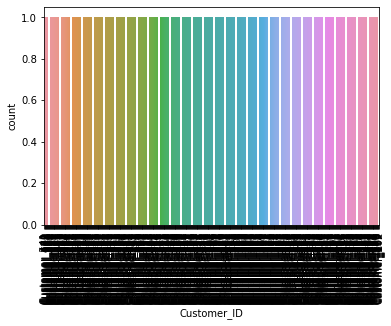

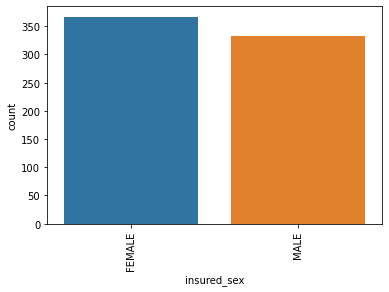

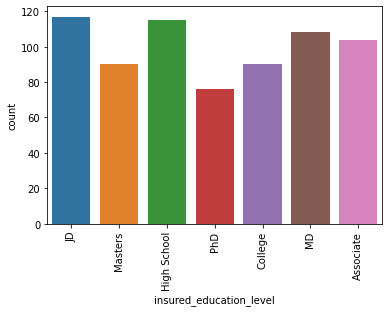

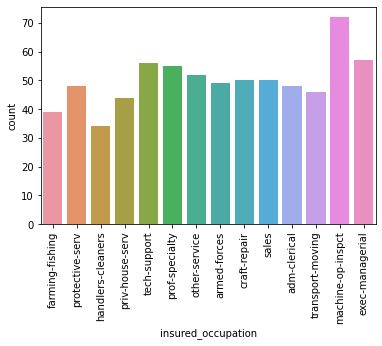

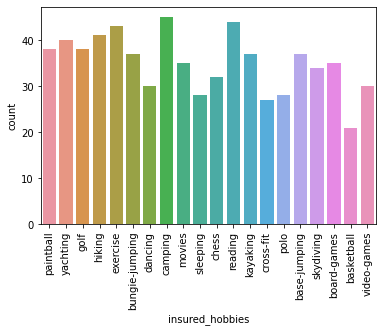

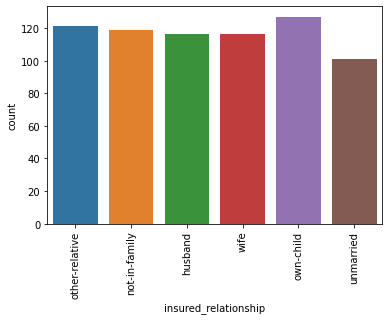

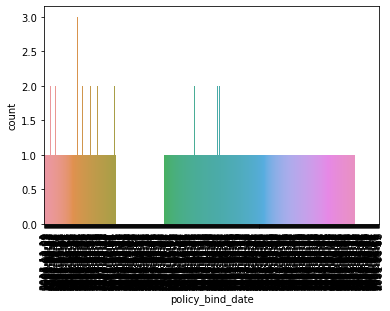

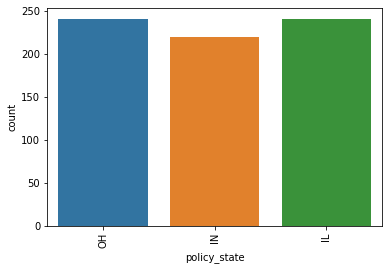

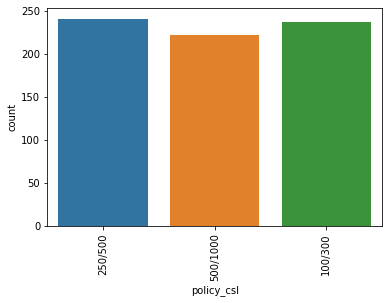

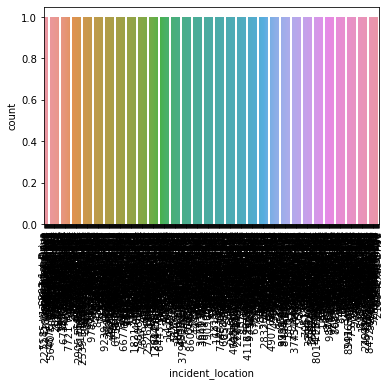

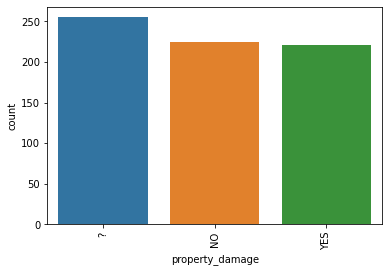

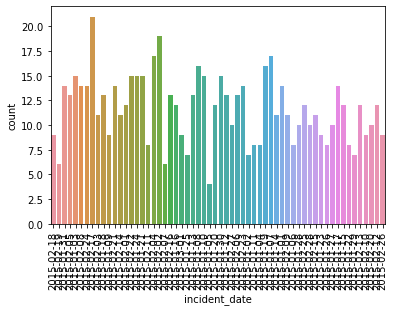

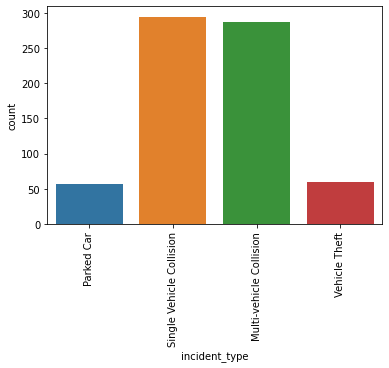

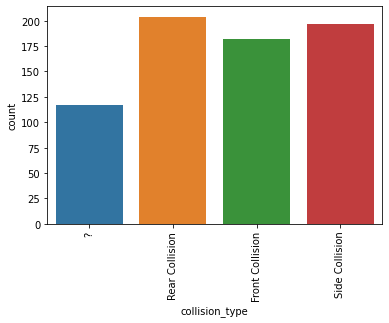

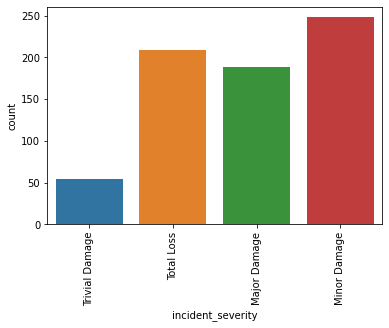

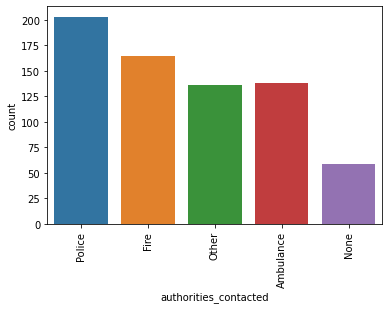

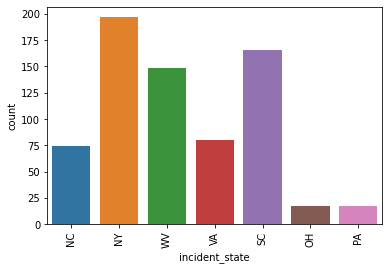

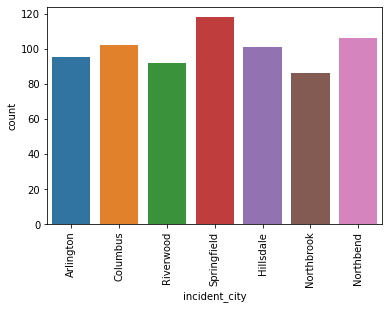

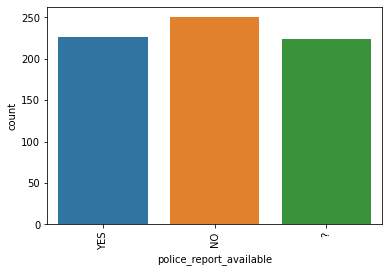

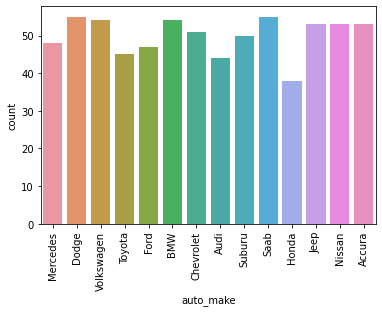

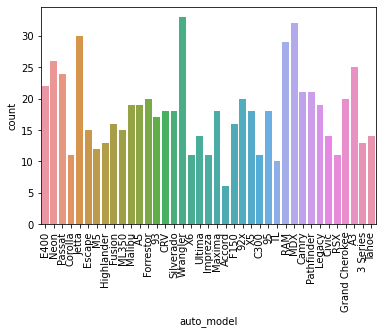

In [12]:
for col in train.select_dtypes('object'):
    plt.xticks(rotation=90)
    sns.countplot(train[col])
    plt.show()

In [13]:
import datetime as dt
date_col=['incident_date','policy_bind_date']
for col in date_col:
    train[col]=pd.to_datetime(train[col])
    test[col]=pd.to_datetime(test[col])

In [14]:
train['incident_date'], train['policy_bind_date']

(0     2015-02-18
 1     2015-02-19
 2     2015-01-31
 3     2015-02-05
 4     2015-01-03
          ...    
 695   2015-01-13
 696   2015-01-27
 697   2015-02-06
 698   2015-02-15
 699   2015-01-29
 Name: incident_date, Length: 700, dtype: datetime64[ns],
 0     2013-11-11
 1     2005-12-09
 2     2001-11-29
 3     2012-10-09
 4     2004-01-02
          ...    
 695   1990-10-07
 696   2013-04-15
 697   2004-11-16
 698   1999-08-29
 699   2001-06-06
 Name: policy_bind_date, Length: 700, dtype: datetime64[ns])

In [15]:
for col in date_col:
    train[col + '_year']=train[col].dt.year
    train[col + '_quarter']=train[col].dt.quarter
    train[col + '_month']=train[col].dt.month
    train[col + '_day']=train[col].dt.day

In [16]:
for col in date_col:
    test[col + '_year']=test[col].dt.year
    test[col + '_quarter']=test[col].dt.quarter
    test[col + '_month']=test[col].dt.month
    test[col + '_day']=test[col].dt.day

In [17]:
train['policy_bind_date_year']

0      2013
1      2005
2      2001
3      2012
4      2004
       ... 
695    1990
696    2013
697    2004
698    1999
699    2001
Name: policy_bind_date_year, Length: 700, dtype: int64

In [18]:
for col in date_col:
    train.drop(col,axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)

In [19]:
train['incident_date_year']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
695    2015
696    2015
697    2015
698    2015
699    2015
Name: incident_date_year, Length: 700, dtype: int64

In [20]:
train.drop('incident_location',axis=1, inplace=True)
test.drop('incident_location',axis=1, inplace=True)

In [21]:
train.drop('Customer_ID',axis=1, inplace=True)
test.drop('Customer_ID',axis=1, inplace=True)

months_as_customer
Skew is 0.3307605275162836


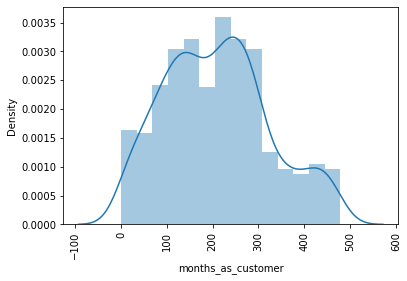

age
Skew is 0.47002573007351983


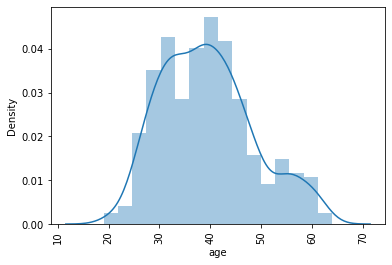

capital-gains
Skew is 0.4514446169854795


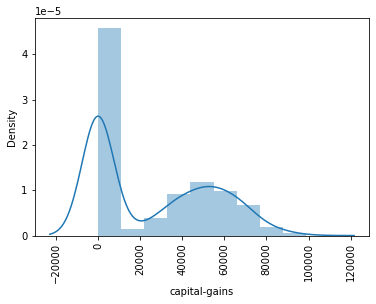

capital-loss
Skew is -0.34796785151945814


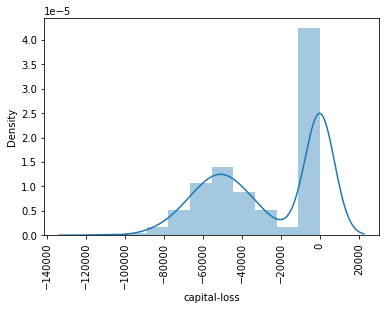

policy_number
Skew is 0.023016572898793768


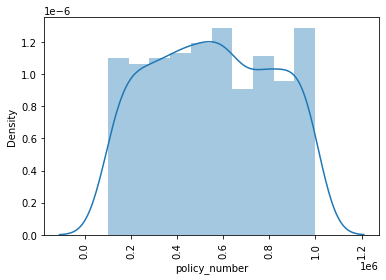

policy_deductable
Skew is 0.45436683566788544


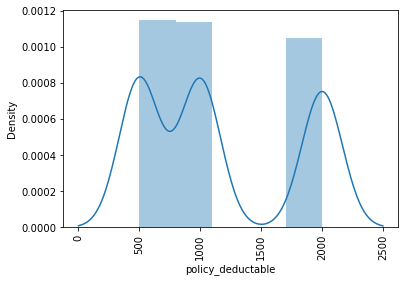

incident_hour_of_the_day
Skew is -0.07359909251628273


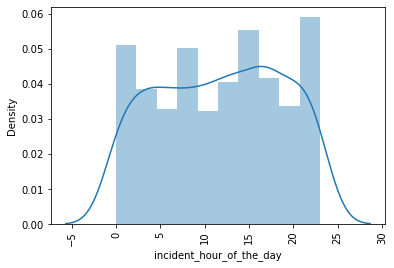

number_of_vehicles_involved
Skew is 0.5077428385518117


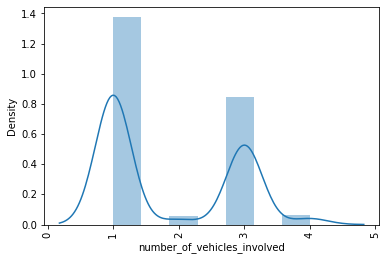

bodily_injuries
Skew is -0.002636595728690542


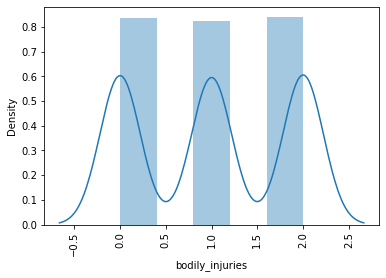

policy_annual_premium
Skew is -0.055572732680208535


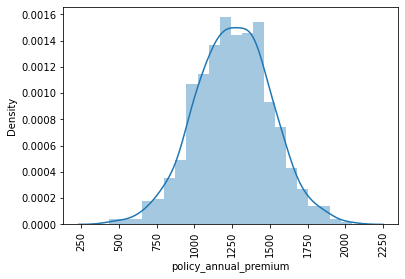

umbrella_limit
Skew is 1.8072926013799575


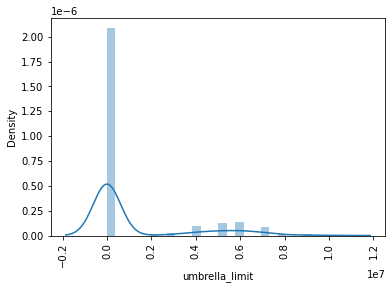

insured_zip
Skew is 0.8383224897695466


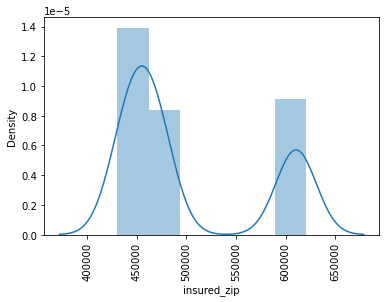

witnesses
Skew is 0.08279783754399149


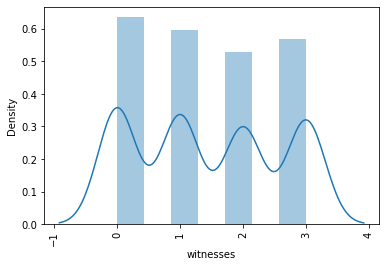

auto_year
Skew is -0.07404549759274225


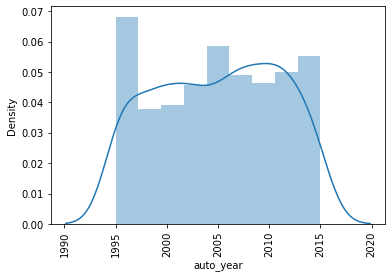

total_claim_amount
Skew is -0.620819836272816


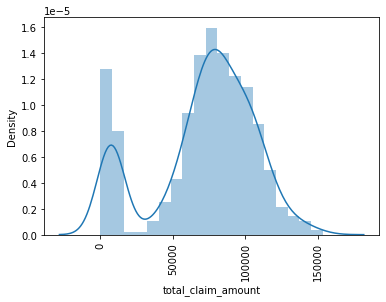

incident_date_year
Skew is 0


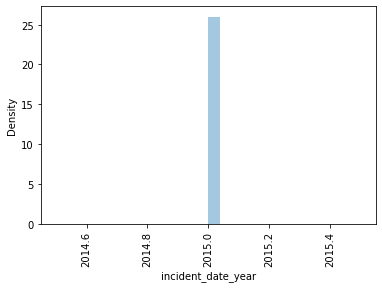

incident_date_quarter
Skew is 0


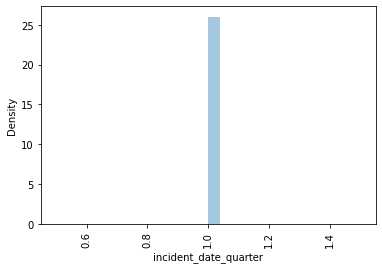

incident_date_month
Skew is 0.24421549145716132


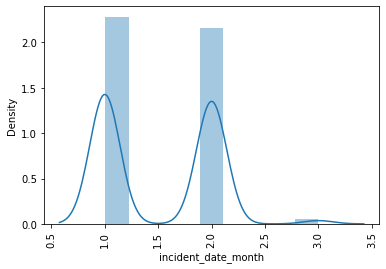

incident_date_day
Skew is 0.03780703320056761


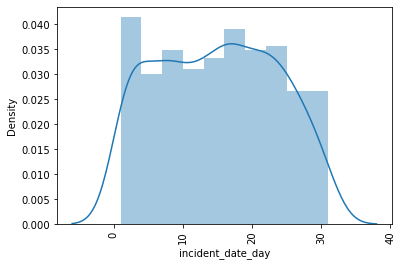

policy_bind_date_year
Skew is 0.09218928240939979


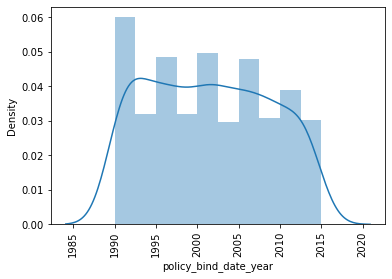

policy_bind_date_quarter
Skew is -0.0774704357104507


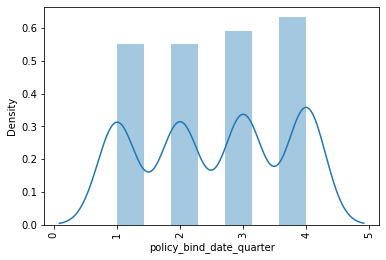

policy_bind_date_month
Skew is -0.0685713409646788


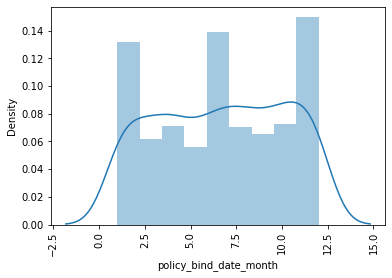

policy_bind_date_day
Skew is -0.003859585311658308


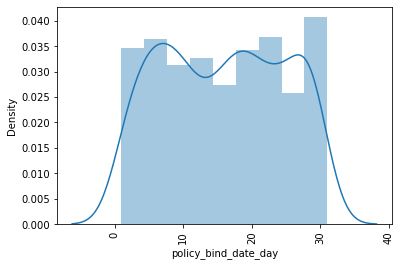

In [22]:
columns=train.select_dtypes('number').columns
for col in columns:
    print(col)
    print(f'Skew is {train[col].skew()}')
    plt.xticks(rotation=90)
    sns.distplot(train[col],kde=True)
    plt.show()
    

0.3307605275162836
-2.0135516296411837


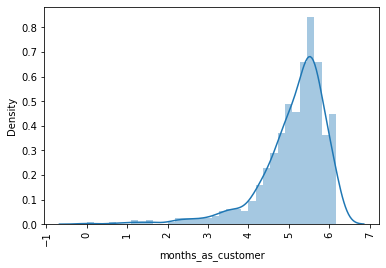

0.47002573007351983
-0.03476852061937029


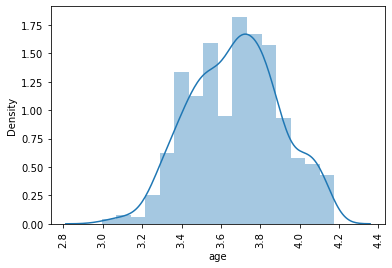

0.4514446169854795
0.006890496582896491


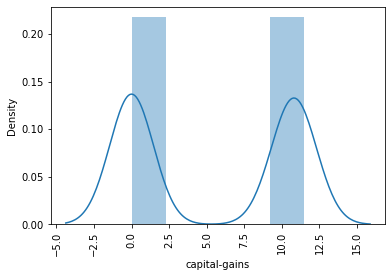

-0.34796785151945814
0


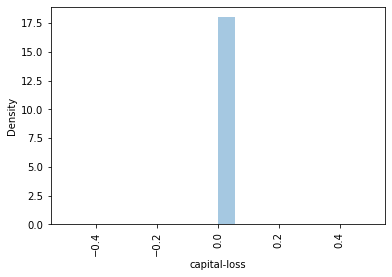

0.023016572898793768
-0.8065543345045906


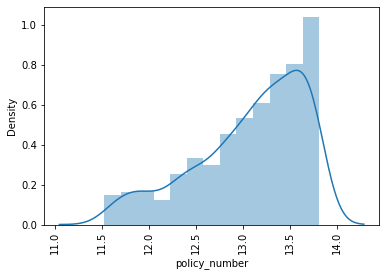

0.45436683566788544
0.055354827357264894


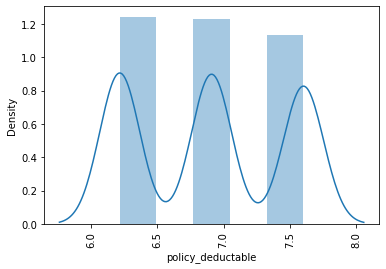

-0.07359909251628273
-1.290212259908351


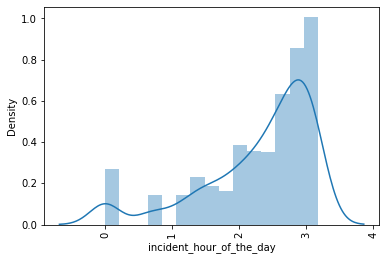

0.5077428385518117
0.4370232120159266


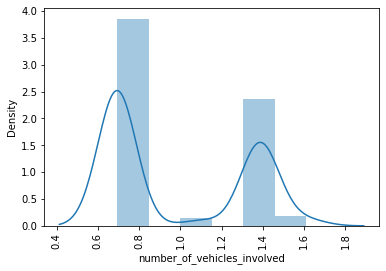

-0.002636595728690542
-0.30730576659689735


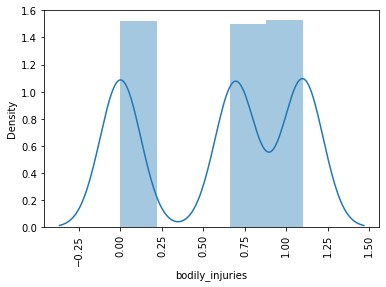

-0.055572732680208535
-0.8270710812648271


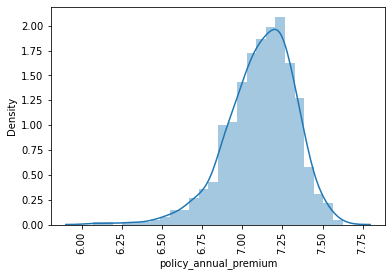

1.8072926013799575
1.51600504496701


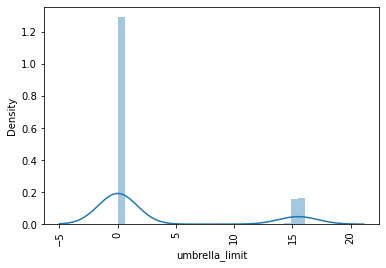

0.8383224897695466
0.8044453334876492


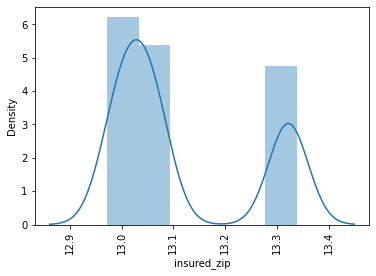

0.08279783754399149
-0.3749375054765717


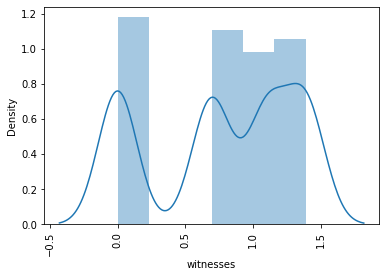

-0.07404549759274225
-0.07771370880289317


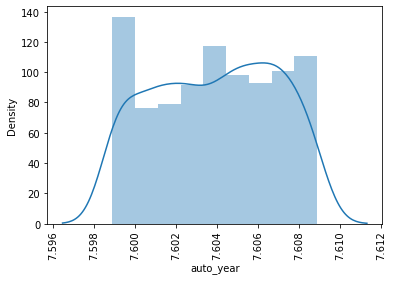

0
0


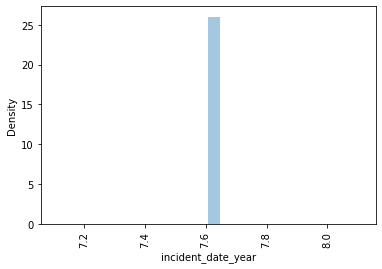

0
0


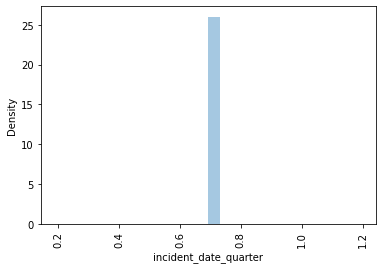

0.24421549145716132
0.13017719510646808


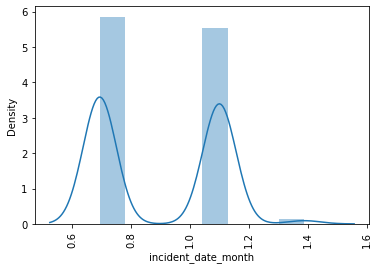

0.03780703320056761
-0.982315974375403


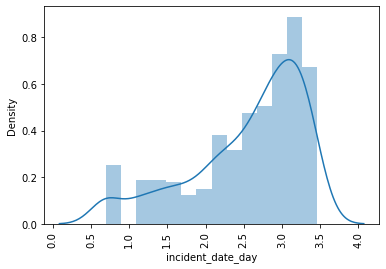

0.09218928240939979
0.08780113956509104


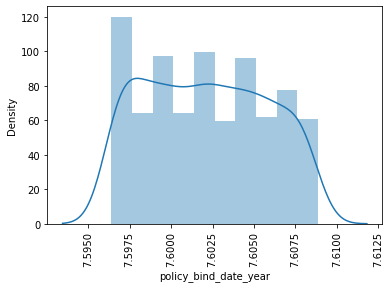

-0.0774704357104507
-0.39524907720653507


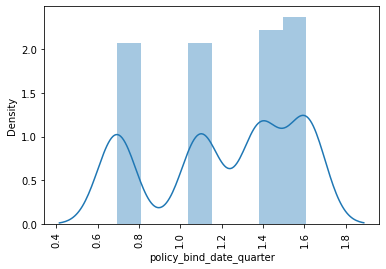

-0.0685713409646788
-0.7639481183044374


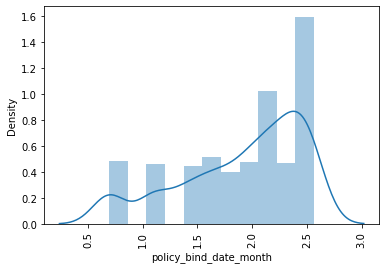

-0.003859585311658308
-0.9691182047060071


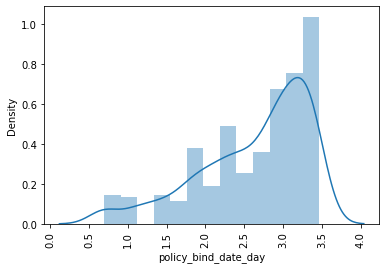

In [23]:
columns=train.select_dtypes('number').columns
for col in columns.drop('total_claim_amount'):
    print (train[col].skew())
  
    train[col]=np.log1p(train[col])
        
    print (train[col].skew())
    plt.xticks(rotation=90)
    sns.distplot(train[col],kde=True)
    plt.show()

In [24]:
train['years_as_customer']=train['months_as_customer']/12
test['years_as_customer']=test['months_as_customer']/12

-2.013551629641185


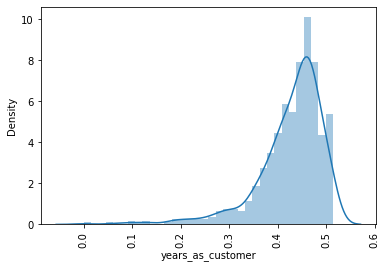

In [25]:
print (train['years_as_customer'].skew())
plt.xticks(rotation=90)
sns.distplot(train['years_as_customer'],kde=True)
plt.show()

In [26]:
train['years_as_customer']

0      0.456720
1      0.390946
2      0.396848
3      0.183102
4      0.423966
         ...   
695    0.511836
696    0.492792
697    0.453535
698    0.386227
699    0.469566
Name: years_as_customer, Length: 700, dtype: float64

In [27]:
train['years_as_customer']=np.round(train['years_as_customer'],2)
test['years_as_customer']=np.round(test['years_as_customer'],2)

In [28]:
train['number_of_vehicles_involved']

0      0.693147
1      0.693147
2      1.386294
3      0.693147
4      1.386294
         ...   
695    1.386294
696    1.386294
697    1.386294
698    0.693147
699    1.386294
Name: number_of_vehicles_involved, Length: 700, dtype: float64

In [29]:
x=np.sort(train['policy_deductable'].unique())


train['policy_deductable']=train['policy_deductable'].replace(x, [500,1000,2000])
test['policy_deductable']=test['policy_deductable'].replace(x, [500,1000,2000])

In [30]:
train['bodily_injuries']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      1.098612
         ...   
695    0.000000
696    1.098612
697    0.693147
698    0.693147
699    1.098612
Name: bodily_injuries, Length: 700, dtype: float64

In [31]:
#train['umbrella_limit']

In [32]:
train.drop('months_as_customer', axis=1, inplace=True)
test.drop('months_as_customer', axis=1, inplace=True)

In [33]:
train['auto_year']=(2015-train['auto_year'])
test['auto_year']=(2015-test['auto_year'])

In [34]:
def cat (x):
    if x==0:
        return(0)
    if x>0 and x<5:
        return(1)
    if x>5 and x<10:
        return (2)
    if x>10 and x<20:
        return(3)
    if x>20 and x<30:
        return(4)
    else:
        return (5)
        
        

In [35]:
#pd.qcut()
#train['years_as_customer']=train['years_as_customer'].apply(cat)
#test['years_as_customer']=test['years_as_customer'].apply(cat)


In [36]:
train['insured_sex']=pd.get_dummies(train[['insured_sex']],drop_first=True)
test['insured_sex']=pd.get_dummies(test[['insured_sex']],drop_first=True)


<AxesSubplot:>

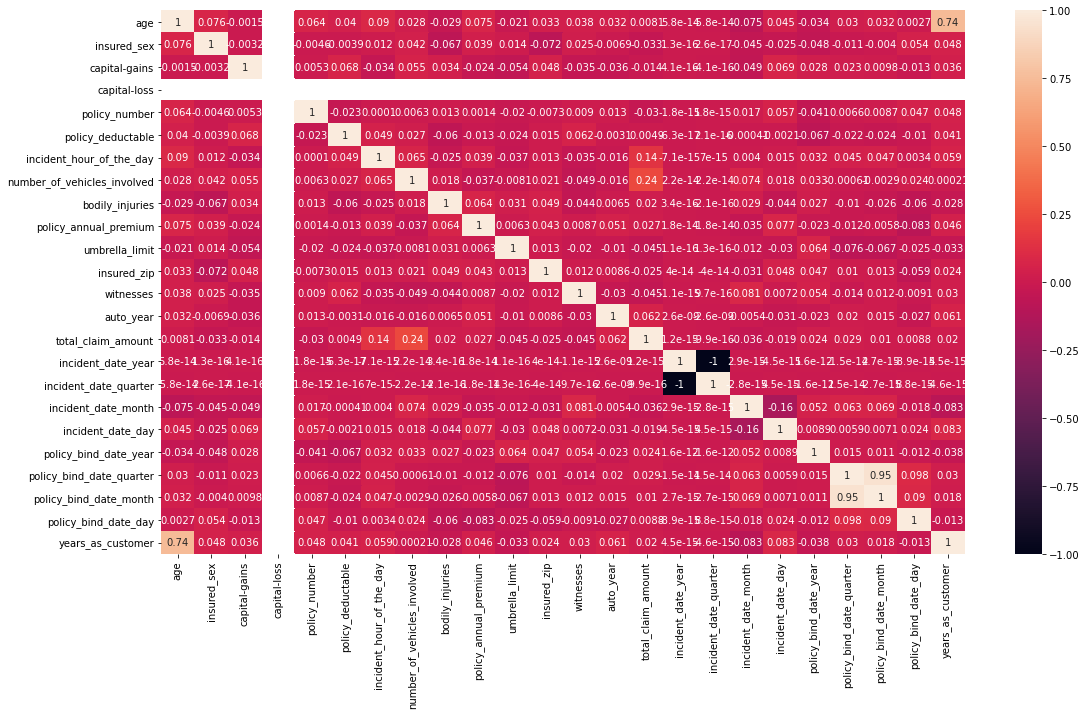

In [37]:
plt.figure(figsize=[18,10])
sns.heatmap(train.corr(),annot=True)

In [38]:
train.drop('capital-loss', axis=1,inplace=True)
test.drop('capital-loss', axis=1,inplace=True)

In [39]:
train.drop(['incident_date_year', 'incident_date_quarter'], axis=1, inplace=True)
test.drop(['incident_date_year', 'incident_date_quarter'], axis=1, inplace=True)

In [40]:
columns1=train.select_dtypes(exclude=['number','category']).columns
columns1
#train=pd.concat([train.drop(columns,axis=1),pd.get_dummies(train[columns],drop_first=True)],axis=1)
for col in columns1:
    train[col]=train[col].replace(train[col].unique(),range(train[col].nunique()))

In [41]:

for col in columns1:
    test[col]=test[col].replace(test[col].unique(),range(test[col].nunique()))

# More Feature Engineering

In [42]:
train['new_1']=train['incident_severity']*train['policy_annual_premium']
test['new_1']=test['incident_severity']*test['policy_annual_premium']

In [43]:
train['new_1a']=train['bodily_injuries']*train['policy_annual_premium']
test['new_1a']=test['bodily_injuries']*test['policy_annual_premium']

In [44]:
train['new_0']=train['policy_annual_premium']*train['policy_number']
test['new_0']=test['policy_annual_premium']*test['policy_number']

In [45]:
train['new_01']=train['new_0']*train['years_as_customer']
test['new_01']=test['new_0']*test['years_as_customer']

In [46]:
train['new_10']=train['new_1']*train['bodily_injuries']
test['new_10']=test['new_1']*test['bodily_injuries']

In [47]:
train['new_11']=train['collision_type']*train['bodily_injuries']*train['incident_severity']
test['new_11']=test['collision_type']*test['bodily_injuries']*test['incident_severity']

In [48]:
train['new_2']=train['collision_type']*train['policy_number']
test['new_2']=test['collision_type']*test['policy_number']

In [49]:
train['new_2a']=train['incident_severity']*train['policy_number']
test['new_2a']=test['incident_severity']*test['policy_number']

In [50]:
train['new_3']=train['collision_type']*train['policy_annual_premium']
test['new_3']=test['collision_type']*test['policy_annual_premium']

In [51]:
train['new_3a']=train['policy_annual_premium']-train['policy_deductable']
test['new_3a']=test['policy_annual_premium']-test['policy_deductable']

In [52]:
train['new_4']=train['incident_severity']*train['policy_annual_premium']
test['new_4']=test['incident_severity']*test['policy_annual_premium']

In [53]:
train['new_8']=train['incident_severity']*train['number_of_vehicles_involved']
test['new_8']=test['incident_severity']*test['number_of_vehicles_involved']

In [54]:
train['new_5']=train['capital-gains']*train['policy_annual_premium']
test['new_5']=test['capital-gains']*test['policy_annual_premium']

In [55]:
train['new_13']=train['capital-gains']-train['policy_deductable']
test['new_13']=test['capital-gains']-test['policy_deductable']

In [56]:
train['new_7']=train['insured_zip']*train['property_damage']
test['new_7']=test['insured_zip']*test['property_damage']

In [57]:
train['new_7']=train['insured_zip']*train['property_damage']
test['new_7']=test['insured_zip']*test['property_damage']

In [58]:
train['new_14']=train['insured_zip']*train['age']
test['new_14']=test['insured_zip']*test['age']

In [59]:
train['new_14a']=train['insured_zip']/train['age']
test['new_14a']=test['insured_zip']/test['age']

In [60]:
train['new_15']=train['insured_zip']*train['policy_state']
test['new_15']=test['insured_zip']*test['policy_state']

In [61]:
train['new_16']=train['insured_zip']*train['collision_type']
test['new_16']=test['insured_zip']*test['collision_type']

In [62]:
train['new_17']=train['insured_zip']*train['policy_number']
test['new_17']=test['insured_zip']*test['policy_number']

In [63]:
train['new_9']=train['insured_zip']*train['witnesses']
test['new_9']=test['insured_zip']*test['witnesses']

In [64]:
train['new_12']=train['years_as_customer']/train['age']
test['new_12']=test['years_as_customer']/test['age']

In [65]:
train['new_12a']=train['age']-train['years_as_customer']
test['new_12a']=test['age']-test['years_as_customer']

<AxesSubplot:>

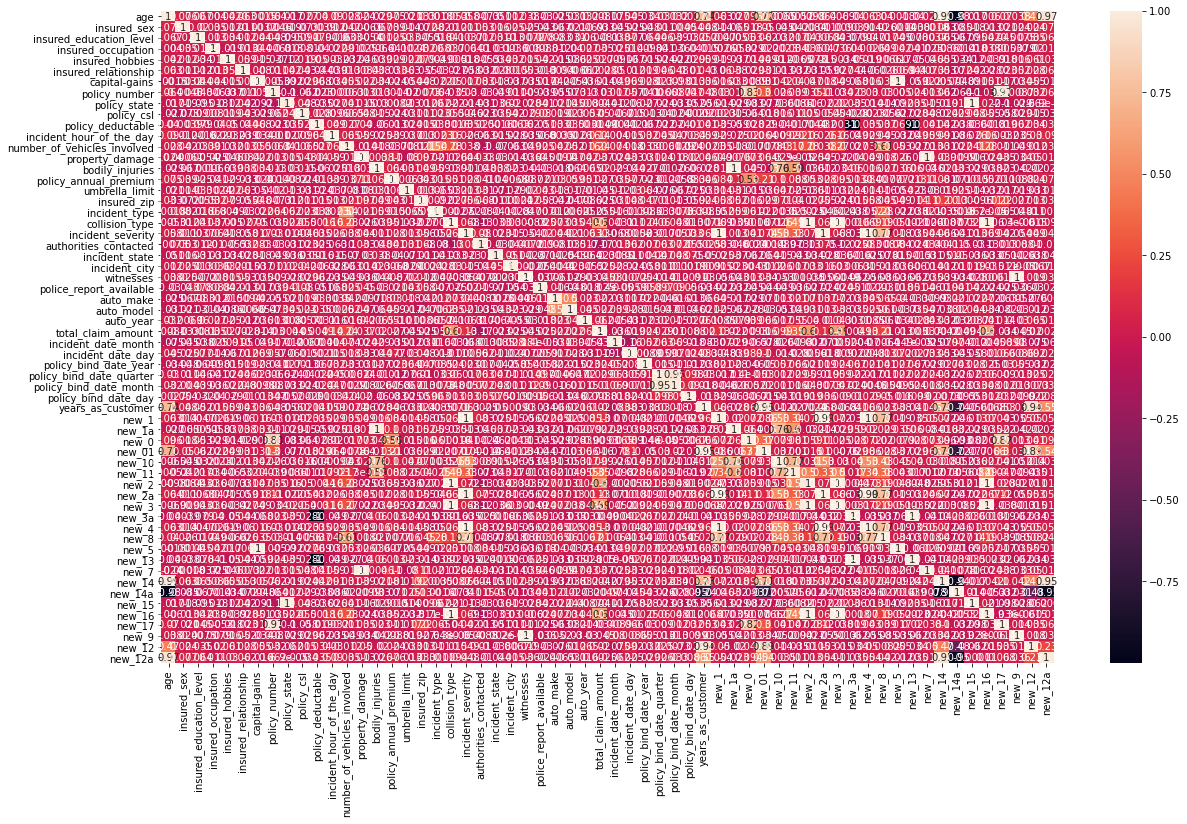

In [66]:
plt.figure(figsize=[20,12])
sns.heatmap(train.corr(),annot=True)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          700 non-null    float64
 1   insured_sex                  700 non-null    uint8  
 2   insured_education_level      700 non-null    int64  
 3   insured_occupation           700 non-null    int64  
 4   insured_hobbies              700 non-null    int64  
 5   insured_relationship         700 non-null    int64  
 6   capital-gains                700 non-null    float64
 7   policy_number                700 non-null    float64
 8   policy_state                 700 non-null    int64  
 9   policy_csl                   700 non-null    int64  
 10  policy_deductable            700 non-null    float64
 11  incident_hour_of_the_day     700 non-null    float64
 12  number_of_vehicles_involved  700 non-null    float64
 13  property_damage     

In [68]:
num=train.drop('total_claim_amount',axis=1).select_dtypes('float64').columns
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
scaled=rs.fit_transform(train[num])
train[num]=scaled

In [69]:
cat_feat=train.drop('total_claim_amount',axis=1).select_dtypes('int64').columns

In [70]:
'''for col in train.select_dtypes(exclude='number').columns:
    plt.xticks(rotation=90)
    sns.countplot(train[col])
    plt.show()'''

"for col in train.select_dtypes(exclude='number').columns:\n    plt.xticks(rotation=90)\n    sns.countplot(train[col])\n    plt.show()"

In [71]:
X= train.drop('total_claim_amount',axis=1)
Y= train['total_claim_amount']

In [72]:
X.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          700 non-null    float64
 1   insured_sex                  700 non-null    uint8  
 2   insured_education_level      700 non-null    int64  
 3   insured_occupation           700 non-null    int64  
 4   insured_hobbies              700 non-null    int64  
 5   insured_relationship         700 non-null    int64  
 6   capital-gains                700 non-null    float64
 7   policy_number                700 non-null    float64
 8   policy_state                 700 non-null    int64  
 9   policy_csl                   700 non-null    int64  
 10  policy_deductable            700 non-null    float64
 11  incident_hour_of_the_day     700 non-null    float64
 12  number_of_vehicles_involved  700 non-null    float64
 13  property_damage     

(None, None)

In [73]:
Y

0       14386.67
1       76440.00
2       79560.00
3      121680.00
4       80640.00
         ...    
695    106400.00
696    113733.33
697     78466.67
698     97866.67
699     38400.00
Name: total_claim_amount, Length: 700, dtype: float64

In [74]:
'''from sklearn.decomposition import PCA
p=PCA(0.95)
X_trans=p.fit_transform(X)
X.shape,X_trans.shape'''

'from sklearn.decomposition import PCA\np=PCA(0.95)\nX_trans=p.fit_transform(X)\nX.shape,X_trans.shape'

In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [76]:
from sklearn.feature_selection import RFECV
selector = RFECV(DecisionTreeRegressor(), cv =5 , step = 1,scoring='neg_root_mean_squared_error')
selector = selector.fit(X,Y)
t=pd.Series(selector.ranking_,(X.columns))
t

age                            32
insured_sex                    10
insured_education_level        16
insured_occupation             34
insured_hobbies                24
insured_relationship           44
capital-gains                  43
policy_number                  14
policy_state                   40
policy_csl                     29
policy_deductable              51
incident_hour_of_the_day       12
number_of_vehicles_involved    54
property_damage                36
bodily_injuries                52
policy_annual_premium          13
umbrella_limit                 55
insured_zip                     7
incident_type                  48
collision_type                 56
incident_severity              47
authorities_contacted          31
incident_state                 23
incident_city                  33
witnesses                      45
police_report_available        46
auto_make                      37
auto_model                     18
auto_year                      22
incident_date_

In [77]:
to_drop=[]
for x in t.index:
    if t[x]>20:
        to_drop.append (x)
to_drop

['age',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'umbrella_limit',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'witnesses',
 'police_report_available',
 'auto_make',
 'auto_year',
 'incident_date_month',
 'policy_bind_date_quarter',
 'years_as_customer',
 'new_1',
 'new_01',
 'new_11',
 'new_2a',
 'new_4',
 'new_5',
 'new_13',
 'new_7',
 'new_14',
 'new_14a',
 'new_15']

In [78]:
X_trans=X.drop(to_drop,axis=1)
test_trans=test.drop(to_drop,axis=1)

In [79]:
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [80]:
#X.drop(['umbrella_limit','insured_relationship'],axis=1,inplace=True)
#test.drop(['umbrella_limit','insured_relationship'],axis=1,inplace=True)

In [81]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Model Selection and Predictive Modelling


In [82]:
models = []
models.append(('Lr', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('gbm', GradientBoostingRegressor()))
models.append(('Decision_Tree', DecisionTreeRegressor()))
models.append(('Adb', AdaBoostRegressor()))
models.append(('Extra_Tree', ExtraTreesRegressor()))
models.append(('lgbm', LGBMRegressor()))
models.append(('xgb', XGBRegressor()))
models.append(('svm', SVR()))
models.append(('Catboost', CatBoostRegressor(silent=True)))



scores=[]

for name, model in models:
    score=cross_val_score(model, X, Y,scoring='neg_root_mean_squared_error',cv=3)
    scores.append({'name':name,'score':np.mean(score)})
    

pd.DataFrame(scores)    

,name,score
0,Lr,-29401.918791
1,RF,-20008.837755
2,gbm,-20899.185830
3,Decision_Tree,-27080.684937
4,Adb,-20481.661611
5,Extra_Tree,-20549.305459
6,lgbm,-21313.115263
7,xgb,-21724.010513
8,svm,-35450.289018
9,Catboost,-20588.471758


In [83]:
rf=RandomForestRegressor()
rf.fit(X_trans,Y)
rf.score(X_trans,Y)

0.951884648246798

In [84]:
pred=rf.predict(test_trans)

In [85]:
param={'Adaboost':{'model':AdaBoostRegressor(),
                     'params':{'n_estimators':[50,90,300,400]}
                      },
   
    'xgboost':{'model':XGBRegressor(),
                     'params':{'learning_rate':[0.1,0.05]}
                      },
    
      'svc':{'model':SVR(),
            'params':{'C':[1,3,9,8],'kernel':['linear','rbf']}
            },
    'RandomF':{'model': RandomForestRegressor(),
              'params':{'n_estimators':[50,70,300,400]}
              },
    'catboost':{'model':CatBoostRegressor(silent=True,cat_features=X.select_dtypes(exclude='number').columns),
                     'params':{'learning_rate':[0.1,0.05,0.02],'n_estimators':[100,300,500,700],'depth':[3, 4, 7,9]
                               }
                      }
    
            
}

In [86]:
from sklearn.model_selection import RandomizedSearchCV
score=[]
for model, mp in param.items():
    cv=RandomizedSearchCV(mp['model'],mp['params'],cv=3,scoring='neg_root_mean_squared_error')
    cv.fit(X, Y)
    score.append({'model_name':model,
                 'params':cv.best_params_,
                 'score':cv.best_score_})
    
pd.DataFrame(score)

,model_name,params,score
0,Adaboost,{'n_estimators': 50},-20321.568998
1,xgboost,{'learning_rate': 0.05},-20764.895528
2,svc,"{'kernel': 'linear', 'C': 9}",-33926.477244
3,RandomF,{'n_estimators': 70},-19828.458609
4,catboost,"{'n_estimators': 100, 'learning_rate': 0.05, '...",-19733.431292


In [87]:
pd.DataFrame(score)

,model_name,params,score
0,Adaboost,{'n_estimators': 50},-20321.568998
1,xgboost,{'learning_rate': 0.05},-20764.895528
2,svc,"{'kernel': 'linear', 'C': 9}",-33926.477244
3,RandomF,{'n_estimators': 70},-19828.458609
4,catboost,"{'n_estimators': 100, 'learning_rate': 0.05, '...",-19733.431292


In [88]:
cat_features=X.select_dtypes(exclude='number').columns
model=CatBoostRegressor(silent=True, learning_rate=0.01,n_estimators=500)

score=cross_val_score(model, X.values, Y,scoring='neg_root_mean_squared_error',cv=7)
print(f'{np.mean(score)}') 


-19787.171634644714


In [94]:
"""from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(CatBoostRegressor(silent=True,cat_features=cat_features), {'learning_rate':[0.1,0.05,0.01],'n_estimators':[100,300,600,700],'depth':[3, 4, 7,9]},cv=5,scoring='neg_root_mean_squared_error')
cv.fit(X, Y)
score=[]
score.append({'model_name':model,
                 'params':cv.best_params_,
                 'score':cv.best_score_})
    
pd.DataFrame(score)"""


"from sklearn.model_selection import RandomizedSearchCV\ncv=RandomizedSearchCV(CatBoostRegressor(silent=True,cat_features=cat_features), {'learning_rate':[0.1,0.05,0.01],'n_estimators':[100,300,600,700],'depth':[3, 4, 7,9]},cv=5,scoring='neg_root_mean_squared_error')\ncv.fit(X, Y)\nscore=[]\nscore.append({'model_name':model,\n                 'params':cv.best_params_,\n                 'score':cv.best_score_})\n    \npd.DataFrame(score)"

In [90]:
model.fit(X,Y)
pred=model.predict(test)

In [91]:
pred

array([64855.7859496 , 82071.61051397, 66839.93985717, 83395.71997526,
       81514.2269777 , 80822.21656957, 82605.50670329, 82442.15690893,
       85919.63457576, 82457.33934243, 80531.69929306, 84016.85811537,
       84441.75251559, 66657.55420939, 82159.97504876, 81580.15211623,
       83286.10432709, 80579.67443036, 65776.73314798, 81698.95571538,
       67074.52266885, 79825.64094022, 83327.68752851, 82657.23584234,
       84745.37878671, 84949.94355652, 82765.81128797, 66135.44417426,
       82031.53371172, 84356.17764048, 65733.80590839, 84692.11088477,
       83594.73123172, 83124.72892709, 83097.91565767, 83081.84208324,
       66984.30945198, 84295.32646705, 80729.79684776, 85178.02954127,
       84293.31495542, 80465.67922374, 83648.8711747 , 83386.88505998,
       67297.08584906, 68003.13935824, 67501.24683843, 84446.18747015,
       82212.56305536, 81858.54388998, 67802.44368935, 81943.77419374,
       84088.01074771, 66420.09014127, 86410.15654784, 85206.85194164,
      

In [92]:
sub=pd.read_csv('sample_submission.csv')
sub['total_claim_amount']=pred

In [93]:
sub.to_csv('Sub2.csv',index=False)